## Imports

In [85]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import numpy as np


# Result module
import Boston_valuation as val

## dataset

In [2]:
boston_dataset=load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dir(boston_dataset)  #displays dataset attributes

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
type(boston_dataset.data)

numpy.ndarray

In [9]:
boston_dataset.feature_names #columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston_dataset.data.shape

(506, 13)

In [11]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with pandas dataframe

In [12]:
data=pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [16]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64

In [17]:
data.shape

(506, 13)

In [18]:
#adding price column
data['PRICES']=boston_dataset.target

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICES     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
data['PRICES'][0:5]  #printing first five house prices (24 ~ 24000)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICES, dtype: float64

## checking for missing values

In [21]:
pd.isnull(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICES     False
dtype: bool

In [23]:
#alternate way to check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICES     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## visualizing dataset

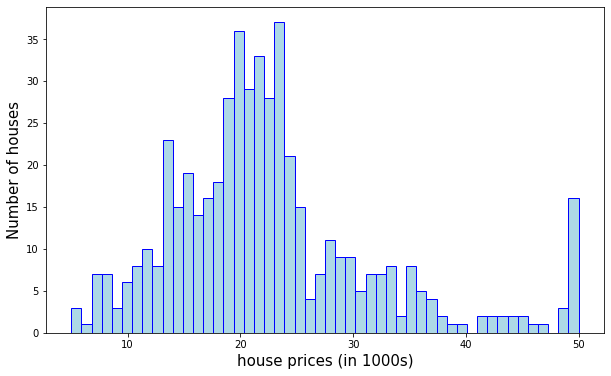

In [24]:
# visualizing house prices
plt.figure(figsize=(10,6))
plt.hist(data['PRICES'],ec='blue',color='lightblue',bins=50)
plt.xlabel('house prices (in 1000s)',fontsize=15)
plt.ylabel('Number of houses',fontsize=15)
plt.show()

## visualizing through seaborn

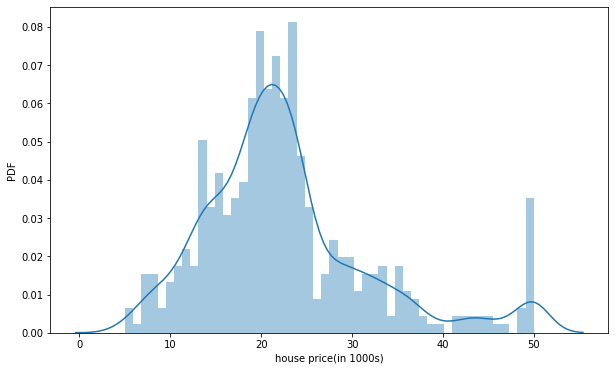

In [25]:
# visualizing house prices(alternate using distribution plot)
plt.figure(figsize=(10,6))
sns.distplot(data['PRICES'],bins=50)
plt.xlabel('house price(in 1000s)')
plt.ylabel('PDF')
plt.show()

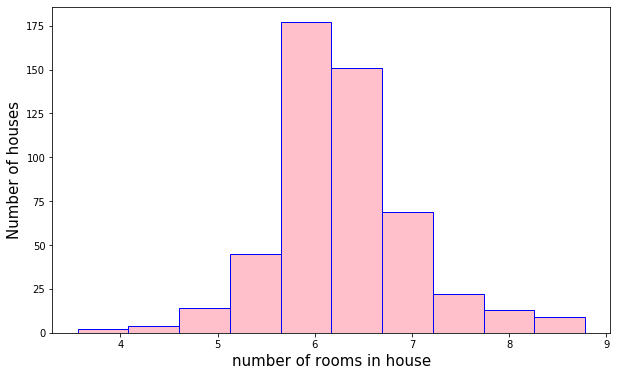

In [26]:
# visualizing avg number of rooms in house
plt.figure(figsize=(10,6))
plt.hist(data['RM'],ec='blue',color='pink')
plt.xlabel('number of rooms in house',fontsize=15)
plt.ylabel('Number of houses',fontsize=15)
plt.show()

In [27]:
data['RM'].mean() #mean value of avg number of rooms

6.284634387351787

In [28]:
data['PRICES'].mean() 

22.532806324110698

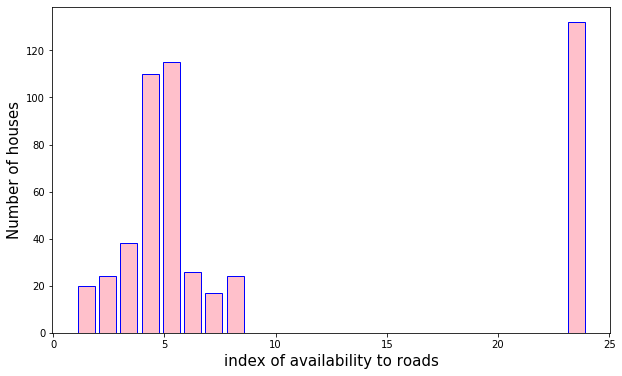

In [29]:
# visualizing index of accesibility to roads (1 - 24)
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],ec='blue',color='pink',bins=24,rwidth=0.8)
plt.xlabel('index of availability to roads',fontsize=15)
plt.ylabel('Number of houses',fontsize=15)
plt.show()

In [30]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

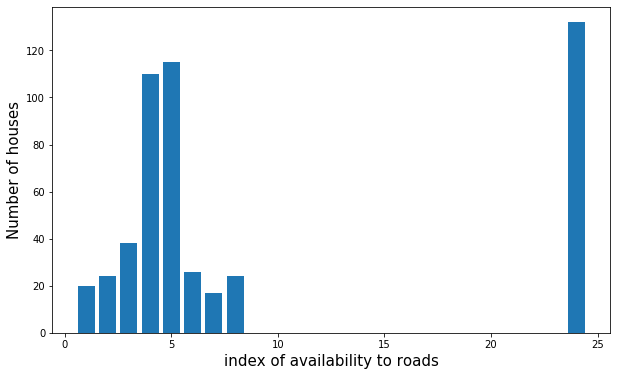

In [31]:
# visualizing index of accesibility to roads (1 - 24) using bar chart
frequency=data['RAD'].value_counts()
frequency
frequency.index

plt.figure(figsize=(10,6))
plt.bar(frequency.index,frequency)
plt.xlabel('index of availability to roads',fontsize=15)
plt.ylabel('Number of houses',fontsize=15)
plt.show()

In [32]:
data['RAD'].mean()

9.549407114624506

In [33]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive statistics

In [34]:
data['PRICES'].min()

5.0

In [35]:
data['PRICES'].max()

50.0

In [36]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICES       5.00000
dtype: float64

In [37]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICES      50.0000
dtype: float64

In [38]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICES      22.532806
dtype: float64

In [39]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICES      21.20000
dtype: float64

In [40]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation


## $$ \rho _{XY} = corr(X,Y) $$ 
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [41]:
# understanding correlation between prices and number of rooms in house
data['PRICES'].corr(data['RM']) #strong positive correlation

0.6953599470715396

In [42]:
# understanding correlation between prices and pupil to teacher ratio (10 pupil,2 teacher then ration 10/2)
data['PRICES'].corr(data['PTRATIO']) #negative correlation

-0.5077866855375618

In [43]:
#correlation between all features
data.corr() #pearson correlation coefficient (default)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [44]:
mask = np.zeros_like(data.corr())
triangular_indices = np.triu_indices_from(mask)
mask[triangular_indices]= True
mask


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

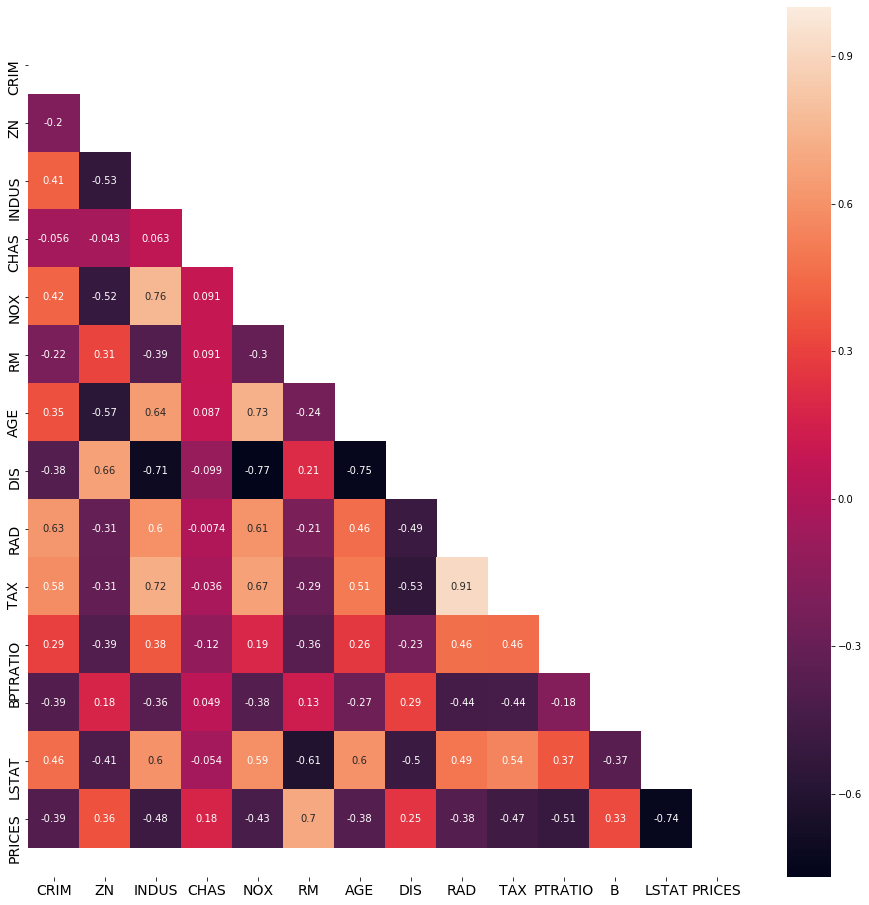

In [45]:
plt.figure(figsize=(16,16))
ax=sns.heatmap(data.corr(),mask=mask,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Creating scatterplot between DIS(distance of employment) and NOX(pollution)

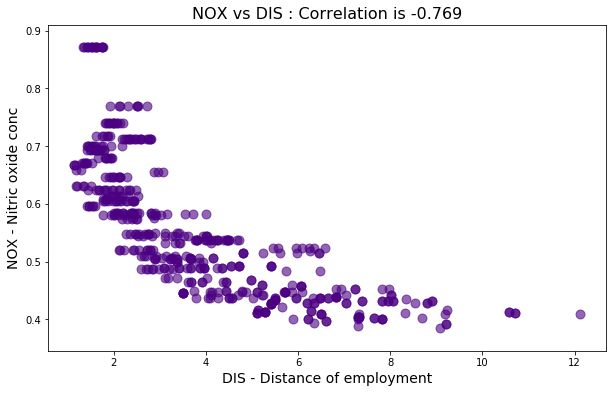

In [46]:
plt.figure(figsize=(10,6))
dis_nox_corr = round(data['NOX'].corr(data['DIS']),3)
plt.scatter(x=data['DIS'],y=data['NOX'],alpha=0.6,c='indigo',s=80)
plt.title(f'NOX vs DIS : Correlation is {dis_nox_corr}',fontsize=16)
plt.xlabel('DIS - Distance of employment',fontsize=14)
plt.ylabel('NOX - Nitric oxide conc',fontsize=14)
plt.show()

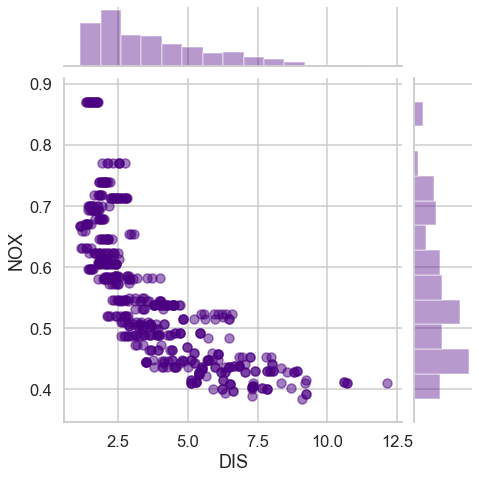

In [47]:
#implementing same above using seaborn
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7,color='indigo',joint_kws={'alpha' : 0.5})
plt.show()

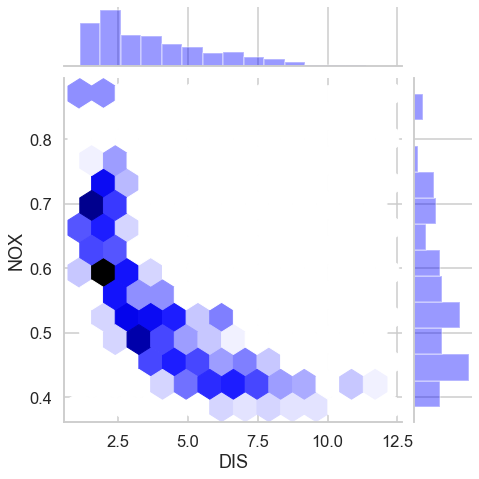

In [48]:
#implementing same above using seaborn
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7,color='blue',kind='hex') #darker hex boxes large density of points
plt.show()

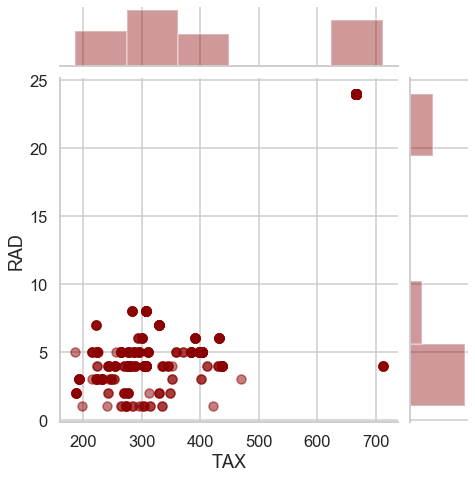

In [49]:
#implementing same above using seaborn
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'],y=data['RAD'],height=7,color='darkred',joint_kws={'alpha' : 0.5})
plt.show()

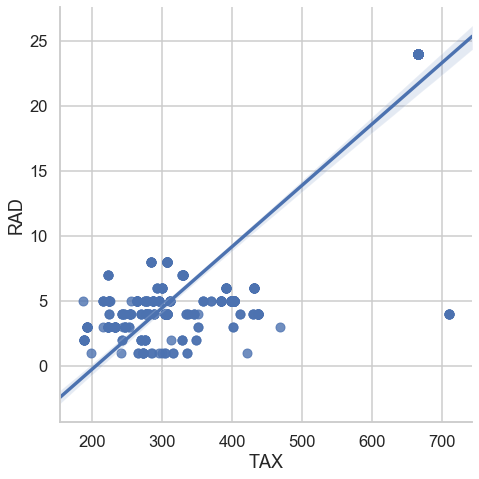

In [50]:
#creting regression line using sns module
sns.lmplot(x='TAX',y='RAD',data=data,height=7)

### Creating scatterplot between house prices and number of rooms

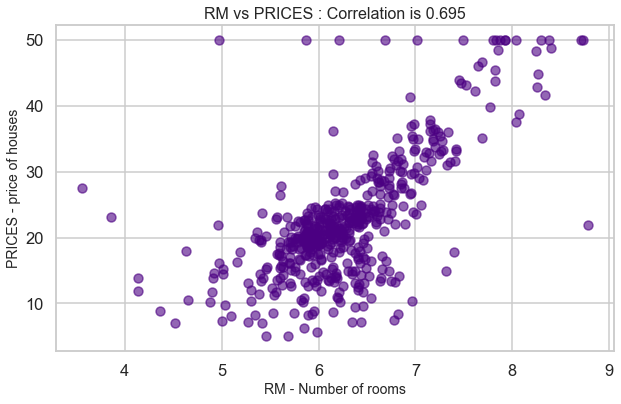

In [51]:
plt.figure(figsize=(10,6))
rm_price_corr = round(data['RM'].corr(data['PRICES']),3)
plt.scatter(x=data['RM'],y=data['PRICES'],alpha=0.6,c='indigo',s=80)
plt.title(f'RM vs PRICES : Correlation is {rm_price_corr}',fontsize=16)
plt.xlabel('RM - Number of rooms',fontsize=14)
plt.ylabel('PRICES - price of houses',fontsize=14)
plt.show()

C:\Users\Nagaraj U\Downloads\anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


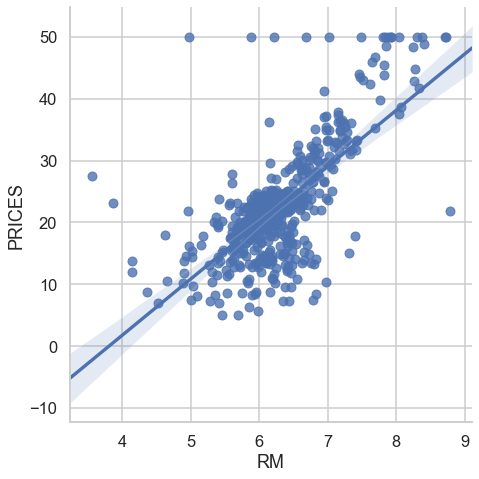

In [52]:
sns.lmplot(x='RM',y='PRICES',data=data,size=7)  #drawing regression line
plt.show()

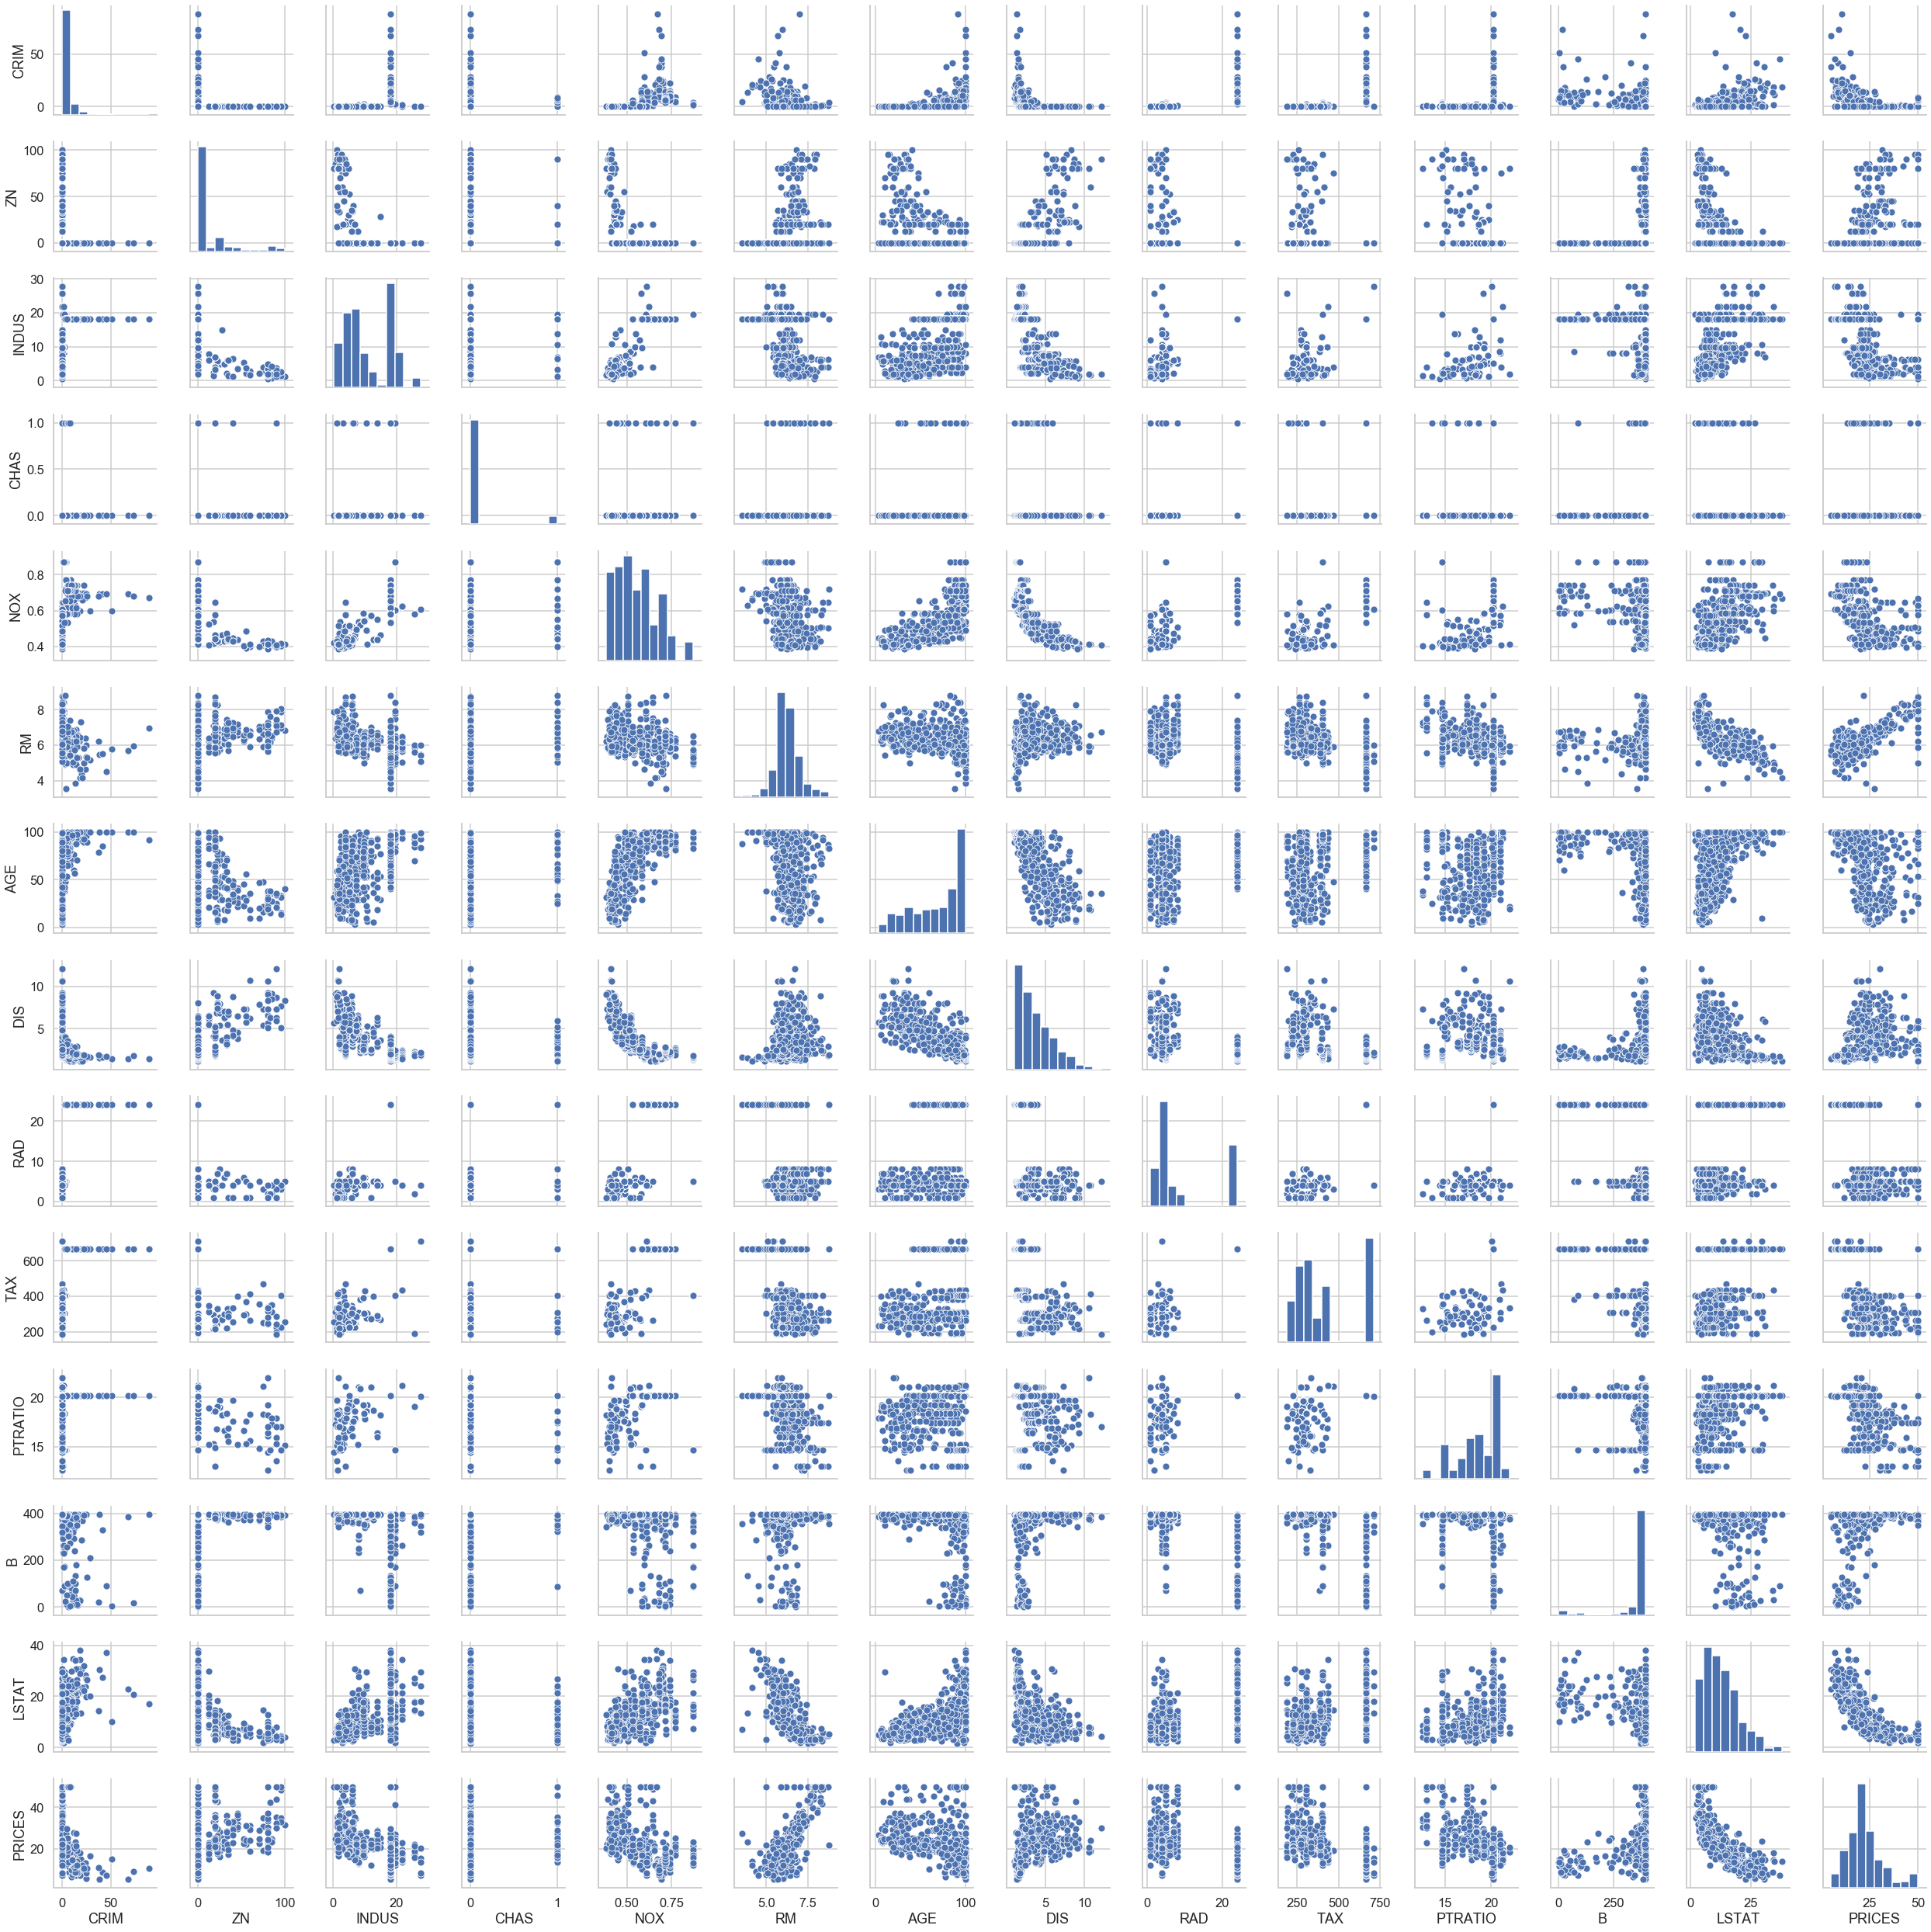

Wall time: 1min 28s


In [53]:
%%time

sns.pairplot(data=data) #plot scatter graph for all combinations
plt.show()

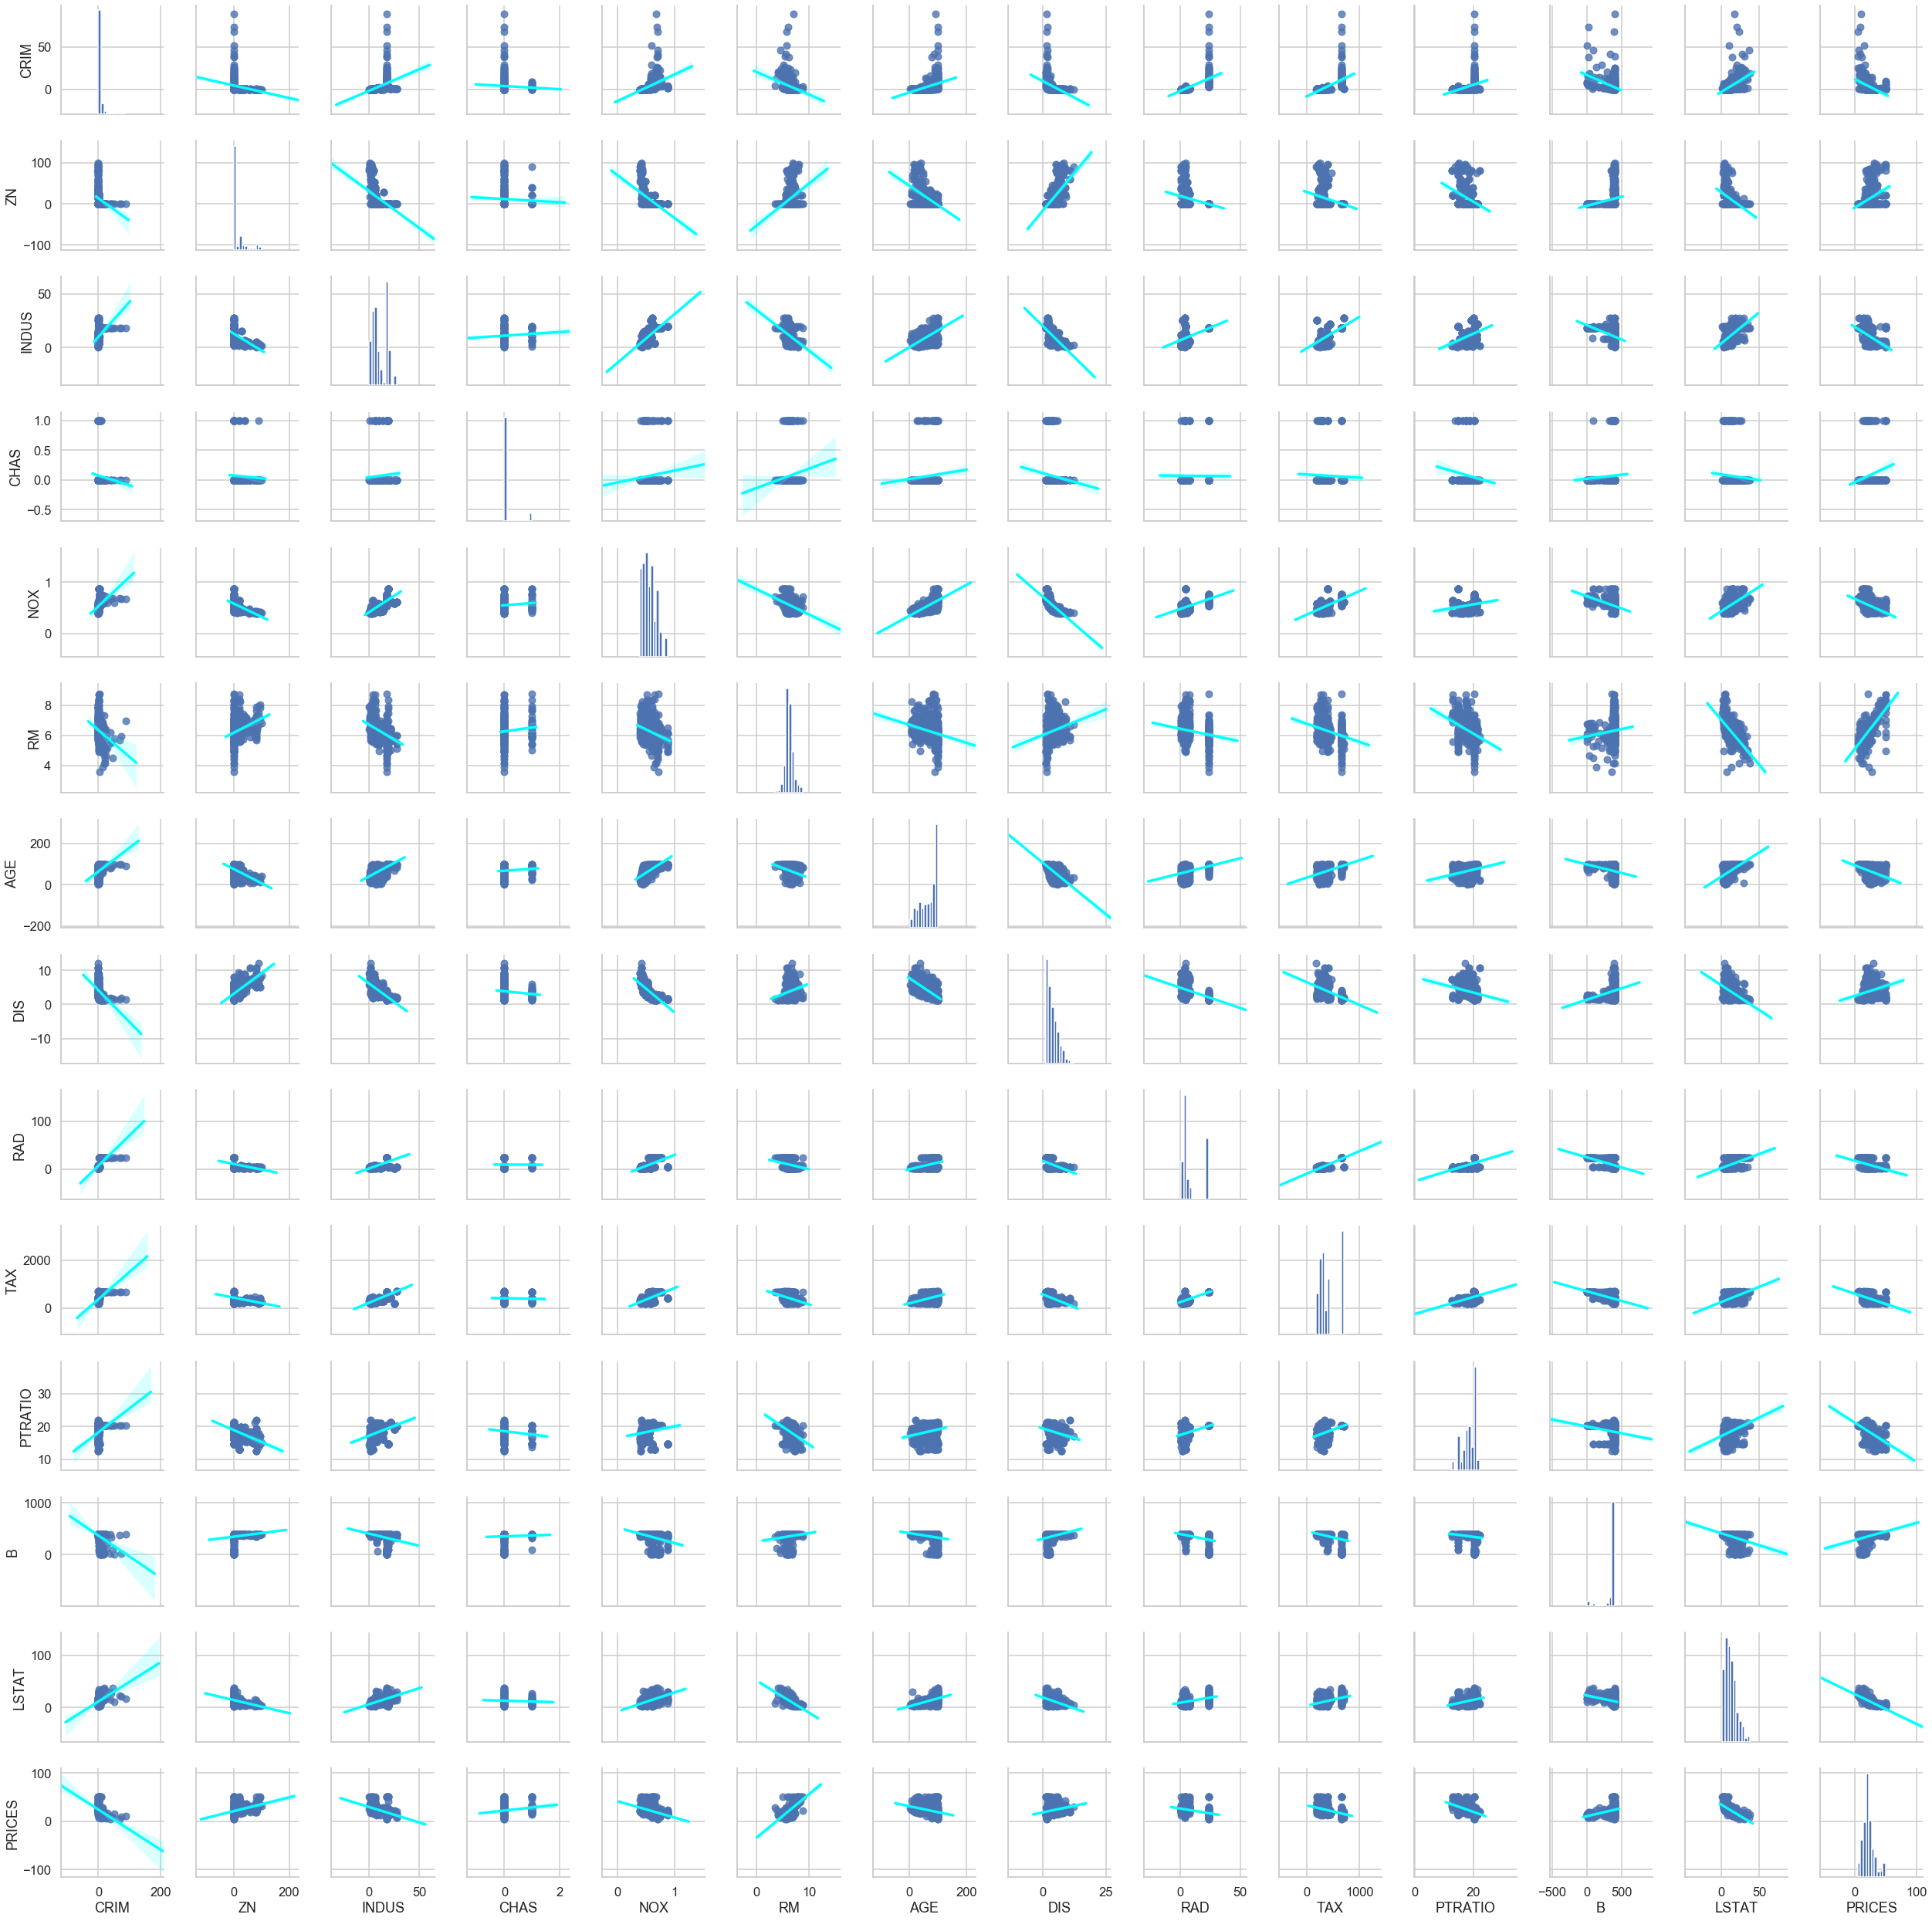

Wall time: 2min 12s


In [54]:
%%time
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color' : 'cyan'}}) #drawing regression line for all combinations
plt.show()

## Splitting dataset into training and test set

In [55]:
prices = data['PRICES']
features = data.drop('PRICES',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10)

In [56]:
X_train.shape

(404, 13)

In [57]:
X_test.shape

(102, 13)

In [58]:
len(X_train)

404

In [59]:
# % of train set data
len(X_train)/len(features)

0.7984189723320159

In [60]:
# % of test set data
X_test.shape[0]/features.shape[0] #alternate way

0.2015810276679842

In [61]:
# Fiting model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#calculating r-squared for training and test set
print("Training data r-squared",regressor.score(X_train,y_train)) #model can understand 75% of varience among features
print("Testing set r-sqaured",regressor.score(X_test,y_test))

#Looking at intercept and coefficient
print('Intercept', regressor.intercept_)
pd.DataFrame(data=regressor.coef_,index=X_train.columns,columns=['coefficient'])

Training data r-squared 0.750121534530608
Testing set r-sqaured 0.6709339839115636
Intercept 36.53305138282418


,coefficient
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


### Regression equation looks like this
#### price = 36.5 - 0.12CRIM + 0.063ZN -0.007INDUS....... 
conclusion : Increase number of rooms by one increases house price by 3100 dollars(3.1) 

## Data transformation

In [62]:
data['PRICES'].skew()

1.1080984082549072

### converting to log prices to get normal distribution (skew = 0)

In [63]:
y_log = np.log(data['PRICES'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICES, dtype: float64

In [64]:
y_log.skew()

-0.33032129530987864

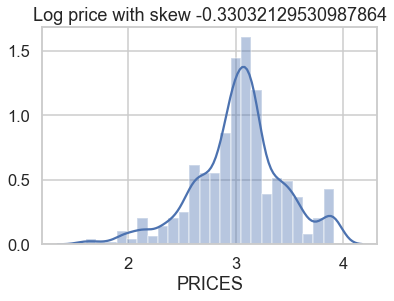

In [65]:
#comparing skew values with Normal price and Log price (skew shoul near to 0)
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

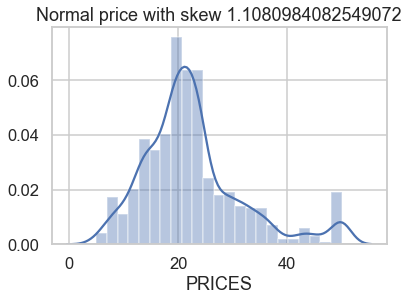

In [66]:
skew_y=data['PRICES'].skew()
sns.distplot(data['PRICES'])
plt.title(f'Normal price with skew {skew_y}')
plt.show()

## Comparing normal price to log price with 'LSTAT' feature

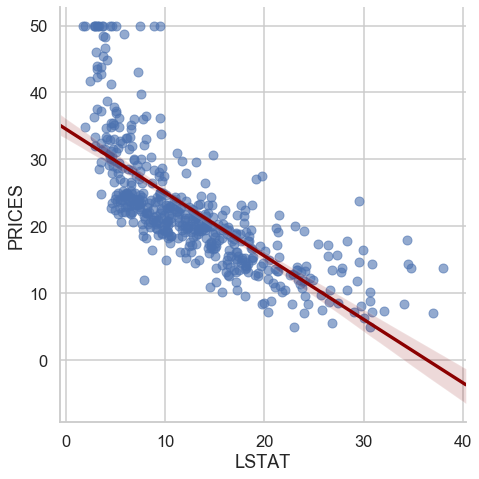

In [67]:
sns.lmplot(x='LSTAT',y='PRICES',data=data,height=7,scatter_kws={'alpha':0.6},line_kws={'color':'darkred'})

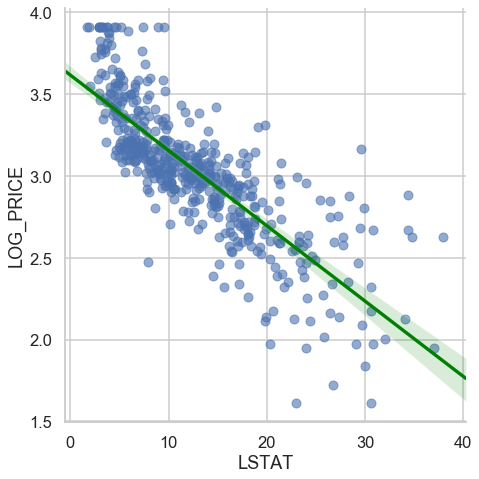

In [68]:
transformed_data = features
transformed_data['LOG_PRICE']=y_log

sns.lmplot(x='LSTAT',y='LOG_PRICE',data=transformed_data,height=7,scatter_kws={'alpha':0.6},line_kws={'color':'green'})

## Regression with Log prices

In [69]:
prices =np.log(data['PRICES'])  #Using log prices
features = data.drop('PRICES',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10)


# Fiting model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#calculating r-squared for training and test set
print("Training data r-squared",regressor.score(X_train,y_train)) #model can understand 75% of varience among features
print("Testing set r-sqaured",regressor.score(X_test,y_test))

#Looking at intercept and coefficient
print('Intercept', regressor.intercept_)
pd.DataFrame(data=regressor.coef_,index=X_train.columns,columns=['coefficient'])

Training data r-squared 0.7930234826697584
Testing set r-sqaured 0.7446922306260724
Intercept 4.059943871775182


,coefficient
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


### Interpretation from using log prices
1. r-squared values are increased for both test and train set
2. for Normal price:
   CHAS	1.974515           
   NOX	-16.271989
   RM	3.108456
   
   for log-prices:
   CHAS	0.080331
   NOX	-0.704068
   RM	0.073404
   
   

In [70]:
#taking antilog of CHAS NOX RM
print(f'for normal CHAS 1.974515 and for log prices CHAS {np.e**0.080331}')
print(f'for normal NOX -16.271989 and for log prices NOX {np.e**0.704068}')
print(f'for normal CHAS 3.108456 and for log prices RM {np.e** 0.073404}')

for normal CHAS 1.974515 and for log prices CHAS 1.0836456950439142
for normal NOX -16.271989 and for log prices NOX 2.021961338519895
for normal CHAS 3.108456 and for log prices RM 1.076165219851658


## p-values and evaluating coefficients
#### p-value > 0.05 (not significant)
#### p-value < 0.05(significant)

In [71]:
X_include_const = sm.add_constant(X_train) #adding intercept and coeff
model = sm.OLS(y_train,X_include_const)
results = model.fit()

results.params
results.pvalues

pd.DataFrame({'coeff' : results.params, 'pvalues': round(results.pvalues,3)})



C:\Users\Nagaraj U\Downloads\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coeff,pvalues
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Checking for multicollinearity

  ### $$TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ..... + \alpha _{12} LSTAT $$
  ### $$ VIF_{TAX} = \frac{1}{1 - R_{TAX} ^ 2}$$


In [72]:
variance_inflation_factor(exog=X_include_const.values,exog_idx=1)

#type(X_include_const)
#len(X_include_const)

1.7145250443932485

In [73]:
#VIF indicates collinearity (two variables are highly correlated not good for model)
vif=[]  #storing VIF of each feature with all other remaining features
for i in range(X_include_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_include_const.values,exog_idx=i))    
#print(vif)
pd.DataFrame({'coeff Name' : X_include_const.columns , 'vif' : np.round(vif,3)})
    

# NOTE : VIF threshold is 10 generally (no vif is above 10 in out model)

,coeff Name,vif
0,const,597.549
1,CRIM,1.715
2,ZN,2.333
3,INDUS,3.943
4,CHAS,1.079
5,NOX,4.410
6,RM,1.840
7,AGE,3.327
8,DIS,4.223
9,RAD,7.314


## Model Simplification and BIC values(bayesian information criteria)

### original model with log prices and all features included

In [74]:
X_include_const = sm.add_constant(X_train) 
model = sm.OLS(y_train,X_include_const)
results = model.fit()

results.params
results.pvalues

original_coeff = pd.DataFrame({'coeff' : results.params, 'pvalues': round(results.pvalues,3)})

#finding BIC and rsquared values
print('BIC value is :',results.bic)
print('r-squared value is :',results.rsquared)



BIC value is : -139.74997769478898
r-squared value is : 0.7930234826697584


### model with log prices and INDUS features excluded

In [75]:
#dropping INDUS features(as pvalue > 0.05) and analyzing model
X_include_const = sm.add_constant(X_train) 
X_include_const = X_include_const.drop(['INDUS'],axis=1)
model = sm.OLS(y_train,X_include_const)
results = model.fit()

results.params
results.pvalues

indus_drop_coeff = pd.DataFrame({'coeff' : results.params, 'pvalues': round(results.pvalues,3)})

#finding BIC and rsquared values
print('BIC value is :',results.bic)
print('r-squared value is :',results.rsquared)



BIC value is : -145.14508855591163
r-squared value is : 0.7927126289415163


### model with log prices and INDUS and AGE features excluded

In [76]:
X_include_const = sm.add_constant(X_train) 
X_include_const = X_include_const.drop(['INDUS','AGE'],axis=1)
model = sm.OLS(y_train,X_include_const)
results = model.fit()

results.params
results.pvalues

indus_age_drop_coeff = pd.DataFrame({'coeff' : results.params, 'pvalues': round(results.pvalues,3)})

#finding BIC and rsquared values
print('BIC value is :',results.bic)
print('r-squared value is :',results.rsquared)



BIC value is : -149.49934294224678
r-squared value is : 0.7918657661852815


### MODEL WITH DROPPED INDUS AND AGE FEATURE PERFORMED WELL
###### BIC value should be low as possible
###### rsquared value should be high

In [77]:
frames = [original_coeff,indus_drop_coeff,indus_age_drop_coeff]
pd.concat(frames,axis=1,sort=True)

,coeff,pvalues,coeff,pvalues,coeff,pvalues
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


### Residual and Residuals plots

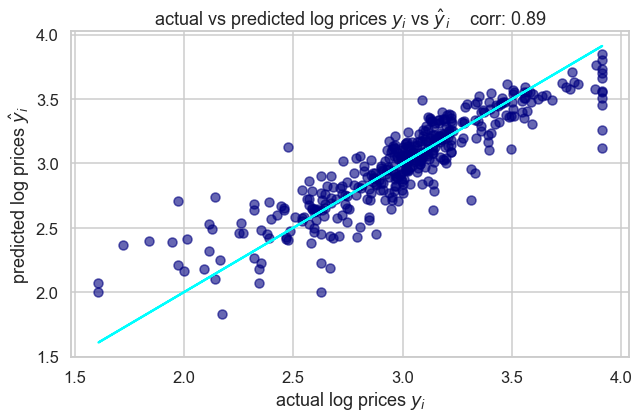

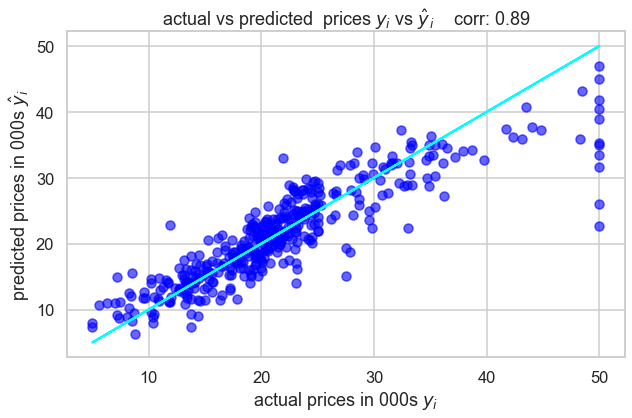

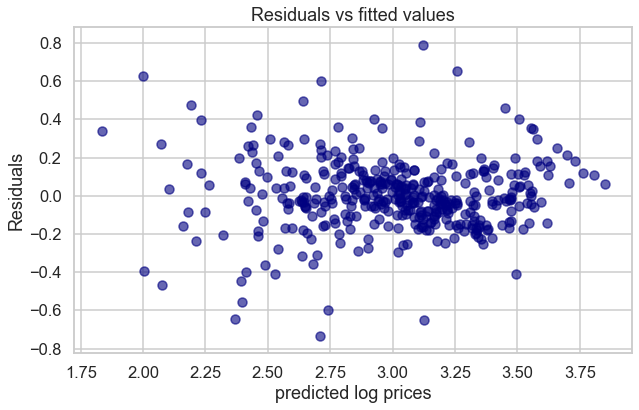

resid mean 0.0
resid skew 0.118


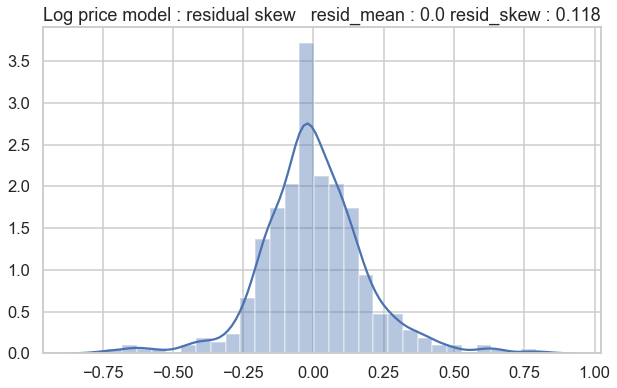

In [78]:
# Modified Model : tramsformed(using log prices) and simplified(dropping two features)
prices = np.log(data['PRICES'])
features = data.drop(['PRICES','INDUS','AGE'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10)

# Using statsmodel

X_include_const = sm.add_constant(X_train) #adding intercept and coeff
model = sm.OLS(y_train,X_include_const)
results = model.fit()

# Residuals

# residuals = y_train - results.fittedvalues
# residuals
        #OR
#results.resid

#Graph of actual and predicted values
corr = y_train.corr(results.fittedvalues)
round(corr,3)

# Log prices
plt.figure(figsize=(10,6))
plt.scatter(x=y_train,y=results.fittedvalues,alpha=0.6,c='navy')
plt.plot(y_train,y_train,color='cyan')
plt.xlabel('actual log prices $ y_i $')
plt.ylabel('predicted log prices $ \hat y_i$')
plt.title(f'actual vs predicted log prices $y_i$ vs $\hat y_i$    corr: {round(corr,3)}')
plt.show()


# Actual prices
plt.figure(figsize=(10,6))
plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues,alpha=0.6,c='blue')
plt.plot(np.e**y_train,np.e**y_train,color='cyan')
plt.xlabel('actual prices in 000s $ y_i $')
plt.ylabel('predicted prices in 000s $ \hat y_i$')
plt.title(f'actual vs predicted  prices $y_i$ vs $\hat y_i$    corr: {round(corr,3)}')
plt.show()


#Residuals vs predicted values

plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues,y=results.resid,alpha=0.6,c='navy')
plt.xlabel('predicted log prices')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values')
plt.show()


#DISTIBUTION OF RESIDUALS

# checking for normality and mean of residuals
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)
print('resid mean' ,resid_mean)
print('resid skew',resid_skew)

plt.figure(figsize=(10,6))
sns.distplot(results.resid)
plt.title(f'Log price model : residual skew   resid_mean : {resid_mean} resid_skew : {resid_skew}' )
plt.show()



# MEAN SQAURED ERROR AND R-SQUARED
reduced_log_mse = round(results.mse_resid ,3)
reduced_log_rsquared = round(results.rsquared ,3)


In [79]:
# Performing same above steps for Original model
#  1. predicted vs actual
#  2. residuals vs predicted prices
#  3. Residual skew for original model

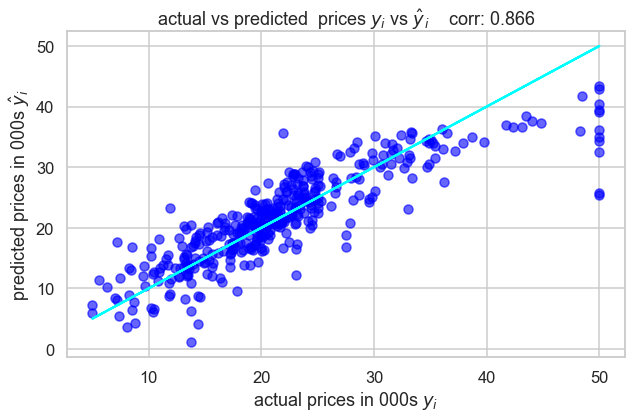

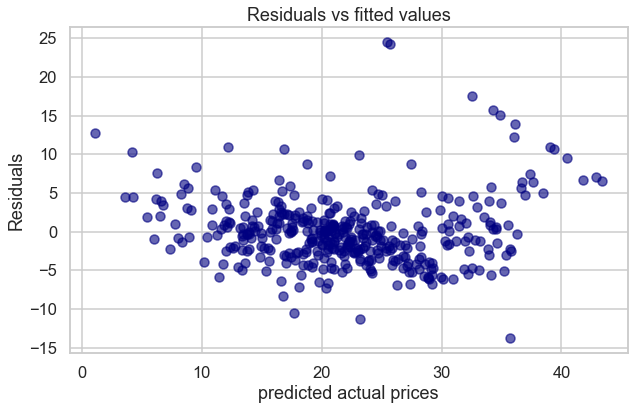

resid mean 0.0
resid skew 1.459


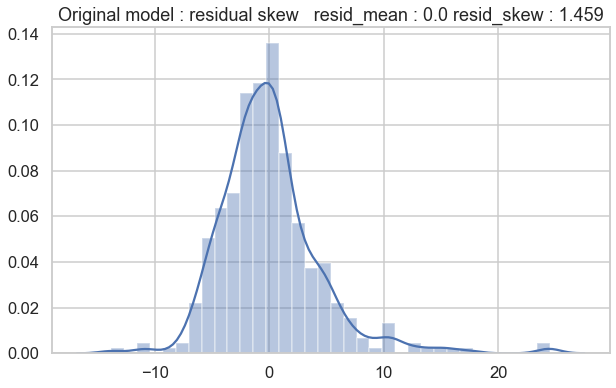

In [80]:
# Original Model 
prices = data['PRICES']
features = data.drop(['PRICES'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10)

# Using statsmodel

X_include_const = sm.add_constant(X_train) #adding intercept and coeff
model = sm.OLS(y_train,X_include_const)
results = model.fit()

# Residuals

# residuals = y_train - results.fittedvalues
# residuals
        #OR
#results.resid

#Graph of actual and predicted values

corr = y_train.corr(results.fittedvalues)
round(corr,3)

# Actual prices
plt.figure(figsize=(10,6))
plt.scatter(x=y_train,y=results.fittedvalues,alpha=0.6,c='blue')
plt.plot(y_train,y_train,color='cyan')
plt.xlabel('actual prices in 000s $ y_i $')
plt.ylabel('predicted prices in 000s $ \hat y_i$')
plt.title(f'actual vs predicted  prices $y_i$ vs $\hat y_i$    corr: {round(corr,3)}')
plt.show()


#Residuals vs predicted values

plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues,y=results.resid,alpha=0.6,c='navy')
plt.xlabel('predicted actual prices')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values')
plt.show()



# Residual distribution chart

# checking for normality and mean of residuals
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)
print('resid mean' ,resid_mean)
print('resid skew',resid_skew)

plt.figure(figsize=(10,6))
sns.distplot(results.resid)
plt.title(f'Original model : residual skew   resid_mean : {resid_mean} resid_skew : {resid_skew}' )
plt.show()


# NOTE : if residuals are around zero then model is performing good (fig 2)





# MEAN SQAURED ERROR AND R-SQUARED
original_mse = round(results.mse_resid ,3)
original_rsquared = round(results.rsquared ,3)

#### Demonstrating what happens if we miss important features in out model (OPTIONAL)

###### Interpretation :  Residual forms clusters

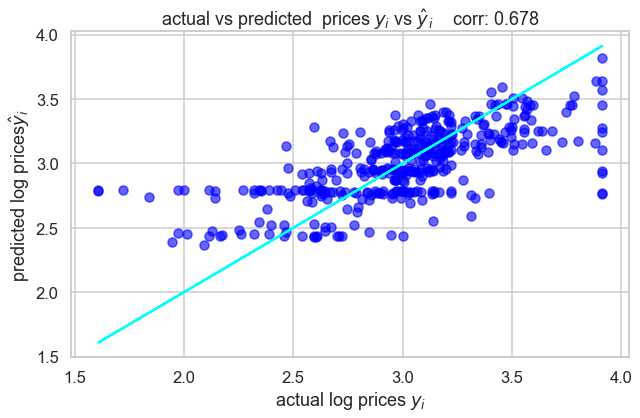

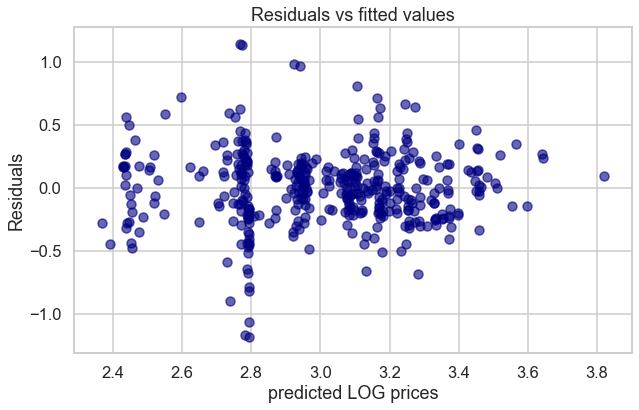

In [81]:
# Reduced Model : tramsformed(using log prices) and simplified(dropping many features)
prices = np.log(data['PRICES'])
features = data.drop(['PRICES','INDUS','AGE','RM','NOX','CRIM','LSTAT'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10)

# Using statsmodel

X_include_const = sm.add_constant(X_train) #adding intercept and coeff
model = sm.OLS(y_train,X_include_const)
results = model.fit()

# Residuals

# residuals = y_train - results.fittedvalues
# residuals
        #OR
#results.resid

#Graph of actual and predicted values

corr = y_train.corr(results.fittedvalues)
round(corr,3)

# Actual prices
plt.figure(figsize=(10,6))
plt.scatter(x=y_train,y=results.fittedvalues,alpha=0.6,c='blue')
plt.plot(y_train,y_train,color='cyan')
plt.xlabel('actual log prices $ y_i $')
plt.ylabel('predicted log prices$ \hat y_i$')
plt.title(f'actual vs predicted  prices $y_i$ vs $\hat y_i$    corr: {round(corr,3)}')
plt.show()


#Residuals vs predicted values

plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues,y=results.resid,alpha=0.6,c='navy')
plt.xlabel('predicted LOG prices')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values')
plt.show()



# MEAN SQAURED ERROR AND R-SQUARED
omitted_log_mse = round(results.mse_resid ,3)
omitted_log_rsquared = round(results.rsquared ,3)


### DISPLAYING MSE AND R-SQUARED ERROR FOR ALL THREE MODELS

In [82]:
pd.DataFrame({'MSE' : [original_mse ,reduced_log_mse, omitted_log_mse],
              'R-SQUARED' : [original_rsquared, reduced_log_rsquared,omitted_log_rsquared],
               'RMSE' : np.sqrt([original_mse ,reduced_log_mse, omitted_log_mse])},
               index=['original model','reduced log model','omiited features model'])


#favourable factors : 
# 1. low mse
# 2. high rsquared(0-1)


,MSE,R-SQUARED,RMSE
original model,19.921,0.750,4.463295
reduced log model,0.035,0.792,0.187083
omiited features model,0.090,0.460,0.300000


In [83]:
# In normal distribution 68% values lies between -sigma to + sigma
# In normal distribution 95% values lies between -2*sigma to + 2*sigma

# challenge : estimate range for 30000 dollars price (calculate upperbound and lowerbound)

In [84]:
print('1 S.D in log prices is ',np.sqrt(reduced_log_mse))
print('2 S.D in log prices is ',2*np.sqrt(reduced_log_mse))

upperbound = np.log(30) + 2*np.sqrt(reduced_log_mse)
lowerbound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('Upper bound in log prices for 95% of prediction interval is ',upperbound)
print('lower bound in log prices for 95% of prediction interval is ',lowerbound)

print('Upper bound in normal prices for 95% of prediction interval is ',np.e**upperbound * 1000)
print('lower bound in normal prices for 95% of prediction interval is ',np.e**lowerbound * 1000)


# 30000 + + 2*np.sqrt(reduced_log_mse)   (wrong)

1 S.D in log prices is  0.18708286933869708
2 S.D in log prices is  0.37416573867739417
Upper bound in log prices for 95% of prediction interval is  3.7753631203395495
lower bound in log prices for 95% of prediction interval is  3.0270316429847615
Upper bound in normal prices for 95% of prediction interval is  43613.34233239937
lower bound in normal prices for 95% of prediction interval is  20635.886906824155


### MAKING PREDICTIONS

In [86]:
val.get_dollar_estimate(rm=9,ptratio=20,chas=True,high=True)

Estimated property value is :$ 762000.0
At 95% the valuation range is : 
USD 523000.0 is estimated lower price and USD 1108000.0 is estimated higher price
